In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
import numpy as np

In [66]:
def bootstrap_gen(dataframe):
    return dataframe.sample(frac=1,replace=True)
def CVratio(experimentdata):
    return (experimentdata["<y>"].std(ddof=0)/experimentdata["<y>"].mean())/(experimentdata["<x>"].std(ddof=0)/experimentdata["<x>"].mean())
def xycorr(experimentdata):
    return experimentdata["<x>"].corr(experimentdata["<y>"])
def bootstrap_stderr_mean(experimentdata,f,n):
    bootstrap_fs = [f(bootstrap_gen(experimentdata)) for i in range(n)]
    return np.std(bootstrap_fs,ddof=0)/np.sqrt(len(experimentdata)),np.mean(bootstrap_fs)
def joinedbootstrap(experimentdata,n):
    rhos = []
    Cs = []
    for i in range(n):
        sample = bootstrap_gen(experimentdata)
        rhos.append(xycorr(sample))
        Cs.append(CVratio(sample))
    return np.std(Cs)/np.sqrt(len(experimentdata)),np.std(rhos)/np.sqrt(len(experimentdata))


files = glob.glob('no_fb_sims_largerange4_2023-02-02/*_simresults.tsv')
dfs = list()
for f in files:
    data = pd.read_csv(f,sep='\t')
    data['file'] = f
    dfs.append(data)

df = pd.concat(dfs, ignore_index=True)

In [67]:
folders = glob.glob('no_fb_sims*')
df = pd.DataFrame()
for i,folder in enumerate(folders):
    files = glob.glob(folder+'/*_simresults.tsv')
    for f in files:
        data = pd.read_csv(f,sep='\t')
        simsettings = pd.read_csv(f[:-14]+'settings.tsv',sep='\t')
        simsettings = simsettings.drop(['cov thres','flux thres'],axis=1)
        data = pd.concat([data,simsettings.loc[simsettings.index.repeat(len(data))].reset_index(drop=True)],axis=1)
        data["file"] = f
        data['covcheck'] = data['cov thres'].apply(lambda x: all(float(i) <= 0.05 for i in x.strip('[]').split(',')))
        df = pd.concat([df,data],ignore_index=True)


In [68]:
df[df['covcheck'] ==  False]

,sim #,Perturbed param,Pert Size,time,steps,flux thres,cov thres,<x>,<y>,Var(x),...,usedparams,params,outcomes,initialstate,numsteps,maxsteps,max tries,thermalisation,file,covcheck
448,1,3,1.200000,7.554372e+05,121293693,"[0.00024122468915402178, 0.0007904620222834291]","[0.07115830295340876, 0.026898948389152535, 0....",5.035536,29.966930,4.964604,...,"[50.0, 10.0, 6.0, 1.0]","[50.0, 10.0, 5.0, 1.0]",[1 0; -1 0; 0 1; 0 -1],"[10, 10]",10000000,1000000000,40,10000.0,no_fb_sims_inddist4_2023-02-06/paramset_1_simr...,False
449,2,1,1.200000,7.455916e+05,134625781,"[5.504955212169533e-5, 7.875649482712163e-6]","[0.061423058382583426, 0.021262673532019605, 0...",6.029624,29.985950,5.971444,...,"[60.0, 10.0, 5.0, 1.0]","[50.0, 10.0, 5.0, 1.0]",[1 0; -1 0; 0 1; 0 -1],"[10, 10]",10000000,1000000000,40,10000.0,no_fb_sims_inddist4_2023-02-06/paramset_1_simr...,False
450,3,3,1.200000,7.556704e+05,121289213,"[0.00018368275618920496, 0.00020178992693197875]","[0.0709794632946049, 0.027174491306825418, 0.1...",5.033394,29.971821,4.964480,...,"[50.0, 10.0, 6.0, 1.0]","[50.0, 10.0, 5.0, 1.0]",[1 0; -1 0; 0 1; 0 -1],"[10, 10]",10000000,1000000000,40,10000.0,no_fb_sims_inddist4_2023-02-06/paramset_1_simr...,False
451,4,1,0.800000,1.117908e+06,134575563,"[0.0003987930958824107, 0.0003494902695936648]","[0.09612133823659536, 0.031421392413650336, 0....",4.047594,19.996451,3.961692,...,"[40.0, 10.0, 5.0, 1.0]","[50.0, 10.0, 5.0, 1.0]",[1 0; -1 0; 0 1; 0 -1],"[10, 10]",10000000,1000000000,40,10000.0,no_fb_sims_inddist4_2023-02-06/paramset_1_simr...,False
452,5,3,0.800000,1.101046e+06,154568774,"[0.00023098284673225098, 0.00015753550508577766]","[0.08163181462427639, 0.024502545817877096, 0....",5.039853,19.995334,4.961741,...,"[50.0, 10.0, 4.0, 1.0]","[50.0, 10.0, 5.0, 1.0]",[1 0; -1 0; 0 1; 0 -1],"[10, 10]",10000000,1000000000,40,10000.0,no_fb_sims_inddist4_2023-02-06/paramset_1_simr...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,16,1,1.070706,4.000676e+07,214580133,"[0.00018666156052115523, 0.000279779240235663]","[-2.698347857139552, 0.6099044834193418, 1.292...",0.844743,0.400050,0.131960,...,NaN,"[2.0, 100.0, 25.0, 1.0]",[1 0; -1 0; 0 1; 0 -1],"[10, 10]",10000000,1000000000,40,10000.0,no_fb_sims_2023-02-02/paramset_12_simresults.tsv,False
2636,17,2,1.155191,4.658995e+07,227059081,"[0.000218504794936181, 4.2801762534921184e-5]","[-2.5596826517902507, 0.6283675578150936, 1.31...",0.865270,0.314367,0.117115,...,NaN,"[2.0, 100.0, 25.0, 1.0]",[1 0; -1 0; 0 1; 0 -1],"[10, 10]",10000000,1000000000,40,10000.0,no_fb_sims_2023-02-02/paramset_12_simresults.tsv,False
2637,18,3,1.108007,3.888213e+07,199014082,"[5.543410764477404e-5, 3.876778213608086e-5]","[-2.762078988289911, 0.6379087736289479, 1.288...",0.836313,0.409016,0.137593,...,NaN,"[2.0, 100.0, 25.0, 1.0]",[1 0; -1 0; 0 1; 0 -1],"[10, 10]",10000000,1000000000,40,10000.0,no_fb_sims_2023-02-02/paramset_12_simresults.tsv,False
2638,19,4,1.146130,4.284423e+07,214615189,"[0.00012419291328373287, 0.0004101848828566073]","[-2.661911872543084, 0.6757433382302712, 1.311...",0.854361,0.309126,0.125133,...,NaN,"[2.0, 100.0, 25.0, 1.0]",[1 0; -1 0; 0 1; 0 -1],"[10, 10]",10000000,1000000000,40,10000.0,no_fb_sims_2023-02-02/paramset_12_simresults.tsv,False


In [69]:
cols = ["file","C","rho","std_rho","std_C","covcheck","numsims"]
pertdata = pd.DataFrame(columns=cols)
df
for f in df['file'].unique():
    #isolate data by parameter set
    experimentdata = df[df["file"] == f]
    #Total sims in the point
    nsims = len(experimentdata)
    #number of sims in data that didn't reach cov balance
    ncov = len(experimentdata[experimentdata["covcheck"]==False])
    #calculate quantity
    rho = xycorr(experimentdata)
    C_val = CVratio(experimentdata)
    #estimate standard error by bootstrapping
    std_Cval,std_rho = joinedbootstrap(experimentdata,5000)
    
    df2 = pd.DataFrame([[f,C_val,rho,std_rho,std_Cval,ncov,nsims]], columns= cols)
    pertdata = pd.concat([pertdata,df2])

All of the points, regardless if good or not

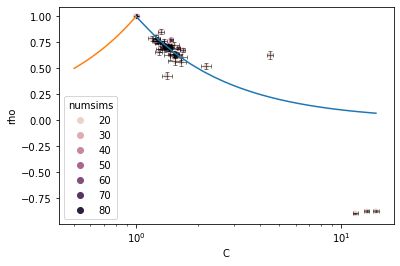

In [70]:
sns.scatterplot(data=pertdata,x="C",y="rho",hue='numsims')
plt.errorbar(y="rho", x="C", xerr="std_C", 
              yerr="std_rho", elinewidth=0.5,data=pertdata, label=None, capsize=2, capthick=0.5,color='k',fmt='none')
plt.plot(np.linspace(1,pertdata["C"].max()),1/np.linspace(1,pertdata["C"].max()))
plt.plot(np.linspace(0.5,1),np.linspace(0.5,1))
plt.xscale('log')

just points where all sims passed covcheck

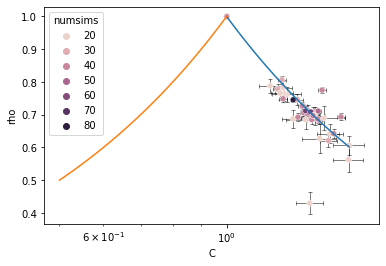

In [71]:
cleared = pertdata[pertdata["covcheck"]==0]
sns.scatterplot(data=cleared,x="C",y="rho",hue='numsims')
plt.errorbar(y="rho", x="C", xerr="std_C", 
              yerr="std_rho", elinewidth=0.5,data=cleared, label=None, capsize=2, capthick=0.5,color='k',fmt='none',zorder=-1)
plt.plot(np.linspace(1,cleared["C"].max()),1/np.linspace(1,cleared["C"].max()))
plt.plot(np.linspace(0.5,1),np.linspace(0.5,1))
plt.xscale('log')

Place to look at other slices

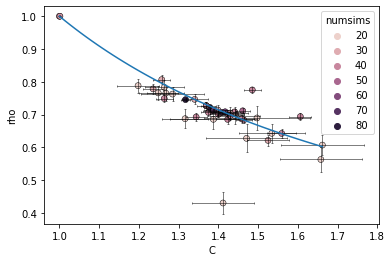

In [81]:
plotted = pertdata[(pertdata['covcheck']==0)]
sns.scatterplot(data=plotted,x="C",y="rho",hue='numsims',alpha=1,edgecolor='k')
plt.errorbar(y="rho", x="C", xerr="std_C", 
              yerr="std_rho", elinewidth=0.5,data=plotted, label=None, capsize=1, capthick=0.5,color='k',fmt='none')
plt.plot(np.linspace(1,plotted["C"].max()),1/np.linspace(1,plotted["C"].max()))

In [73]:
plotted

,file,C,rho,std_rho,std_C,covcheck,numsims
0,no_fb_sims_stderrtest2_2023-02-07/paramset_3_s...,1.606217,0.693579,0.010543,0.027861,0,40
0,no_fb_sims_stderrtest2_2023-02-07/paramset_4_s...,1.398233,0.708215,0.00915,0.019632,0,40
0,no_fb_sims_stderrtest2_2023-02-07/paramset_5_s...,1.421634,0.703634,0.010299,0.019914,0,40
0,no_fb_sims_stderrtest2_2023-02-07/paramset_2_s...,1.464041,0.683152,0.010143,0.020757,0,40
0,no_fb_sims_stderrtest2_2023-02-07/paramset_10_...,1.443599,0.700878,0.009682,0.020685,0,40
0,no_fb_sims_stderrtest2_2023-02-07/paramset_8_s...,1.440977,0.708052,0.009158,0.021411,0,40
0,no_fb_sims_stderrtest2_2023-02-07/paramset_7_s...,1.379812,0.710548,0.009144,0.019322,0,40
0,no_fb_sims_stderrtest2_2023-02-07/paramset_6_s...,1.375014,0.706284,0.009487,0.01973,0,40
0,no_fb_sims_stderrtest2_2023-02-07/paramset_1_s...,1.485349,0.775105,0.008579,0.021913,0,40
0,no_fb_sims_stderrtest2_2023-02-07/paramset_9_s...,1.400208,0.700621,0.009534,0.021152,0,40


Following shows that bootstrapping and doing ten replicates of pert experiment yield similar standard errors

In [74]:
folders = glob.glob('no_fb_sims_stderrtest2*')
dfstd = pd.DataFrame()
for i,folder in enumerate(folders):
    files = glob.glob(folder+'/*_simresults.tsv')
    for f in files:
        data = pd.read_csv(f,sep='\t')
        simsettings = pd.read_csv(f[:-14]+'settings.tsv',sep='\t')
        simsettings = simsettings.drop(['cov thres','flux thres'],axis=1)
        data = pd.concat([data,simsettings.loc[simsettings.index.repeat(len(data))].reset_index(drop=True)],axis=1)
        data["file"] = f
        data['covcheck'] = data['cov thres'].apply(lambda x: all(float(i) <= 0.05 for i in x.strip('[]').split(',')))
        dfstd = pd.concat([dfstd,data],ignore_index=True)

In [75]:
cols = ["file","C","rho","std_rho","std_C","covcheck","numsims"]
pertdatastd = pd.DataFrame(columns=cols)
df
for f in dfstd['file'].unique():
    #isolate data by parameter set
    experimentdata = dfstd[dfstd["file"] == f]
    #Total sims in the point
    nsims = len(experimentdata)
    #number of sims in data that didn't reach cov balance
    ncov = len(experimentdata[experimentdata["covcheck"]==False])
    #calculate quantity
    rho = xycorr(experimentdata)
    C_val = CVratio(experimentdata)
    #estimate standard error by bootstrapping
    std_Cval,std_rho = joinedbootstrap(experimentdata,50000)
    
    df2 = pd.DataFrame([[f,C_val,rho,std_rho,std_Cval,ncov,nsims]], columns= cols)
    pertdatastd = pd.concat([pertdatastd,df2])

In [76]:
pertdatastd

,file,C,rho,std_rho,std_C,covcheck,numsims
0,no_fb_sims_stderrtest2_2023-02-07/paramset_3_s...,1.606217,0.693579,0.010733,0.028009,0,40
0,no_fb_sims_stderrtest2_2023-02-07/paramset_4_s...,1.398233,0.708215,0.00919,0.019665,0,40
0,no_fb_sims_stderrtest2_2023-02-07/paramset_5_s...,1.421634,0.703634,0.010278,0.020048,0,40
0,no_fb_sims_stderrtest2_2023-02-07/paramset_2_s...,1.464041,0.683152,0.010263,0.021164,0,40
0,no_fb_sims_stderrtest2_2023-02-07/paramset_10_...,1.443599,0.700878,0.009564,0.020355,0,40
0,no_fb_sims_stderrtest2_2023-02-07/paramset_8_s...,1.440977,0.708052,0.009207,0.021466,0,40
0,no_fb_sims_stderrtest2_2023-02-07/paramset_7_s...,1.379812,0.710548,0.009221,0.019421,0,40
0,no_fb_sims_stderrtest2_2023-02-07/paramset_6_s...,1.375014,0.706284,0.009464,0.019826,0,40
0,no_fb_sims_stderrtest2_2023-02-07/paramset_1_s...,1.485349,0.775105,0.008514,0.022206,0,40
0,no_fb_sims_stderrtest2_2023-02-07/paramset_9_s...,1.400208,0.700621,0.009532,0.020862,0,40


In [77]:
pertdatastd["C"].std()/np.sqrt(10)

0.021541949871597143

In [78]:
pertdatastd["rho"].std()/np.sqrt(10)

0.007783258671297123

In [79]:
pertdatastd["std_C"].mean()

0.021302150298587612

In [80]:
pertdatastd["std_rho"].mean()

0.009596711533963895

In [87]:
folders = glob.glob('no_fb_sims_indtest*')
dfstd = pd.DataFrame()
for i,folder in enumerate(folders):
    files = glob.glob(folder+'/*_simresults.tsv')
    for f in files:
        data = pd.read_csv(f,sep='\t')
        simsettings = pd.read_csv(f[:-14]+'settings.tsv',sep='\t')
        simsettings = simsettings.drop(['cov thres','flux thres'],axis=1)
        data = pd.concat([data,simsettings.loc[simsettings.index.repeat(len(data))].reset_index(drop=True)],axis=1)
        data["file"] = f
        data['covcheck'] = data['cov thres'].apply(lambda x: all(float(i) <= 0.05 for i in x.strip('[]').split(',')))
        dfstd = pd.concat([dfstd,data],ignore_index=True)

In [88]:
cols = ["file","C","rho","std_rho","std_C","covcheck","numsims"]
pertdatastd = pd.DataFrame(columns=cols)
df
for f in dfstd['file'].unique():
    #isolate data by parameter set
    experimentdata = dfstd[dfstd["file"] == f]
    #Total sims in the point
    nsims = len(experimentdata)
    #number of sims in data that didn't reach cov balance
    ncov = len(experimentdata[experimentdata["covcheck"]==False])
    #calculate quantity
    rho = xycorr(experimentdata)
    C_val = CVratio(experimentdata)
    #estimate standard error by bootstrapping
    std_Cval,std_rho = joinedbootstrap(experimentdata,5000)
    
    df2 = pd.DataFrame([[f,C_val,rho,std_rho,std_Cval,ncov,nsims]], columns= cols)
    pertdatastd = pd.concat([pertdatastd,df2])

In [ ]:
pertdatastd

,file,C,rho,std_rho,std_C,covcheck,numsims
0,no_fb_sims_indtest_careful2023-02-07/paramset_...,1.396174,0.705479,0.025368,0.059654,0,16


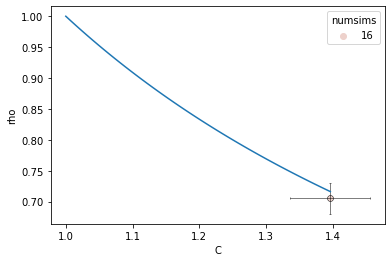

In [ ]:
plotted = pertdatastd[(pertdatastd['covcheck']==0)]
sns.scatterplot(data=plotted,x="C",y="rho",hue='numsims',alpha=1,edgecolor='k')
plt.errorbar(y="rho", x="C", xerr="std_C", 
              yerr="std_rho", elinewidth=0.5,data=plotted, label=None, capsize=1, capthick=0.5,color='k',fmt='none')
plt.plot(np.linspace(1,plotted["C"].max()),1/np.linspace(1,plotted["C"].max()))